# **Airbnb New York - Data Analysis**
---

# **Importing Libraries and Source Files**
---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd

In [2]:
df = pd.read_csv("listings.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,21935608,Rental unit in New York · ★4.67 · 1 bedroom · ...,5448955,Mike,Manhattan,East Village,40.73179,-73.98679,Entire home/apt,NaN,30,15,2019-08-25,0.20,1,0,0,NaN
1,743430766348459803,Rental unit in Brooklyn · 1 bedroom · 1 bed · ...,83422715,D,Brooklyn,Flatbush,40.65375,-73.95502,Entire home/apt,289.0,30,0,NaN,NaN,1,365,0,NaN
2,22122723,Rental unit in New York · 1 bedroom · 1 bed · ...,43719554,Bersabel,Manhattan,Harlem,40.82440,-73.94598,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
3,22434861,Rental unit in Brooklyn · 3 bedrooms · 4 beds ...,5925222,Sophia,Brooklyn,Bushwick,40.69020,-73.91782,Entire home/apt,NaN,30,1,2018-01-01,0.01,1,0,0,NaN
4,35713272,Rental unit in New York · 1 bedroom · 1 bed · ...,268631641,Harris,Manhattan,East Village,40.72385,-73.97695,Private room,NaN,30,1,2019-06-20,0.02,1,0,0,NaN


# **Data Preprocessing**
---

In this section, we will choose only the relevant columns form the dataset.

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [5]:
df = df.drop("name", axis=1)
df = df.drop("last_review", axis=1)

# **Data Cleaning**
---

## **Handling Missing Values**
Missing values are to be handled as per reference. Sometimes they may need to be removed, maybe replaced with a specific value or if necessary, the entire column may be dropped.

### **1. Checking Missing Values**

It is not necessary always to delete a missing value, if possible it helps greatly if we can substitute with some other value.

In [6]:
# looking at data dimensions
df.shape

(39719, 16)

In [7]:
# finding total null values per column
df.isna().sum()

id                                    0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                             10628
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 11543
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           35027
dtype: int64

### **2. Handling rows with empty host_name**

Since only 5 rows have empty values, we can remove those specific rows.

In [8]:
df = df.dropna(subset=['host_name'])

### **3. Handling rows with empty "price"**

**10,628** entries have missing prices. Deleting these many values will cause a large loss of data, as result we fill the **NA** values with 0.

In [9]:
df["price"].fillna(0, inplace=True)
df["price"] = df["price"].astype(int)

### **3. Handling "license" columns**

`license` contains mostly empty values so we drop it

In [10]:
df = df.drop('license', axis=1)

### **4. Handling all empty "rewiews_per_month" entries**

In [11]:
# taking a look at the data
df['reviews_per_month'].unique()

array([2.000e-01,       nan, 1.000e-02, 2.000e-02, 3.000e-02, 1.300e-01,
       2.400e-01, 8.000e-02, 1.670e+00, 1.380e+00, 7.000e-02, 1.600e-01,
       3.400e-01, 4.000e-02, 1.000e-01, 2.600e-01, 1.500e-01, 6.000e-02,
       5.000e-02, 1.710e+00, 2.200e-01, 6.700e-01, 2.300e-01, 7.800e-01,
       1.700e-01, 1.800e-01, 8.200e-01, 2.900e-01, 3.100e-01, 4.700e-01,
       3.600e-01, 2.100e-01, 5.000e-01, 9.000e-02, 2.800e-01, 1.690e+00,
       2.500e-01, 9.400e-01, 6.800e-01, 1.400e-01, 1.540e+00, 1.040e+00,
       2.420e+00, 1.200e-01, 2.170e+00, 1.200e+00, 7.100e-01, 1.100e-01,
       3.900e-01, 1.430e+00, 4.200e-01, 5.400e-01, 2.640e+00, 5.200e-01,
       2.220e+00, 2.700e-01, 1.900e-01, 3.750e+00, 7.400e-01, 3.450e+00,
       1.490e+00, 1.400e+00, 1.030e+00, 9.700e-01, 1.860e+00, 9.300e-01,
       2.750e+00, 2.450e+00, 4.000e-01, 2.320e+00, 9.900e-01, 1.110e+00,
       9.600e-01, 1.410e+00, 1.560e+00, 2.380e+00, 1.730e+00, 1.440e+00,
       3.800e-01, 5.600e-01, 3.000e+00, 1.050e+00, 

- We can round off the data to nearest integers for easier processing, but before that let us fill the empty values with a unique value so that it does not mixed up with the existing ones.

In [12]:
df["reviews_per_month"].fillna(-1, inplace=True)
df["reviews_per_month"] = df["reviews_per_month"].astype(int)

- It is always a best practice to check for null values once we have finished fixing them.

In [13]:
df.isna().sum()

id                                0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### **5. Finding duplicate entries**

Every database has unique identifier called the `PRIMARY KEY`. It cannot be `NULL` and must be `UNIQUE` in order to maintain uniqueness in the database.

In [14]:
df["id"].duplicated().sum()

0

- Since there are no `DUPLICATE` or `NULL` values, we can now proceed furthur.

### **6. Checking Data Types**

It is important to check the data types of the columns in order to avoid unexped behaviours and errors.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39714 entries, 0 to 39718
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39714 non-null  int64  
 1   host_id                         39714 non-null  int64  
 2   host_name                       39714 non-null  object 
 3   neighbourhood_group             39714 non-null  object 
 4   neighbourhood                   39714 non-null  object 
 5   latitude                        39714 non-null  float64
 6   longitude                       39714 non-null  float64
 7   room_type                       39714 non-null  object 
 8   price                           39714 non-null  int32  
 9   minimum_nights                  39714 non-null  int64  
 10  number_of_reviews               39714 non-null  int64  
 11  reviews_per_month               39714 non-null  int32  
 12  calculated_host_listings_count  39714

- The data types seem to be correct as per the `data dictionary`.

### **7. Fixing index**

After removal of missing values, the index has several missinf values, as a reuslt we need to restart the index from zero,

In [16]:
df.reset_index(drop=True)
df.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,21935608,5448955,Mike,Manhattan,East Village,40.73179,-73.98679,Entire home/apt,0,30,15,0,1,0,0
1,743430766348459803,83422715,D,Brooklyn,Flatbush,40.65375,-73.95502,Entire home/apt,289,30,0,-1,1,365,0
2,22122723,43719554,Bersabel,Manhattan,Harlem,40.82440,-73.94598,Private room,0,30,0,-1,1,0,0
3,22434861,5925222,Sophia,Brooklyn,Bushwick,40.69020,-73.91782,Entire home/apt,0,30,1,0,1,0,0
4,35713272,268631641,Harris,Manhattan,East Village,40.72385,-73.97695,Private room,0,30,1,0,1,0,0


## **Data Analysis**
---

There are several types of `Data Analysis` that can be performed. It is a good practice to `categorise` them.

### **1. Descriptive Analysis**

- Quick Statistical Overview

In [17]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.971400e+04,3.971400e+04,39714.000000,39714.000000,39714.000000,39714.000000,39714.000000,39714.000000,39714.000000,39714.000000,39714.000000
mean,3.170034e+17,1.618203e+08,40.729272,-73.946330,155.690286,29.794556,25.212620,0.190336,43.032230,154.666893,5.833812
std,4.116319e+17,1.733869e+08,0.056349,0.054557,815.715024,29.885329,58.116936,1.582267,128.692008,148.113626,16.402354
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,0.000000
25%,2.040707e+07,1.701355e+07,40.689003,-73.982890,0.000000,30.000000,0.000000,-1.000000,1.000000,0.000000,0.000000
50%,4.679648e+07,8.090583e+07,40.726350,-73.954230,90.000000,30.000000,4.000000,0.000000,1.000000,119.000000,0.000000
75%,7.665961e+17,2.918780e+08,40.762610,-73.926810,175.000000,30.000000,22.000000,0.000000,7.000000,315.000000,4.000000
max,1.061633e+18,5.539914e+08,40.911380,-73.713650,100000.000000,1250.000000,1865.000000,75.000000,713.000000,365.000000,1075.000000


- `Nighbourhood Group` **with maximum number of listings**

In [18]:
df["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        17435
Brooklyn         14558
Queens            5998
Bronx             1357
Staten Island      366
Name: count, dtype: int64

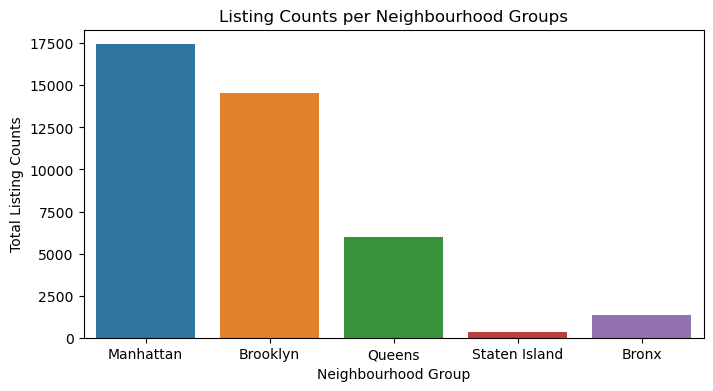

In [19]:
# plotting a count plot for "neighbourhood_group"
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='neighbourhood_group')
plt.title("Listing Counts per Neighbourhood Groups")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Total Listing Counts")
plt.show()

- `Neighbourhood` in `Manhattan` with highest Listing

In [20]:
# extracting only Manhattan listings 
manhattan_listing = df[df["neighbourhood_group"]=="Manhattan"]

# restricting result to only 5 most listed neighbourhoods
manhattan_listing["neighbourhood"].value_counts().nlargest(5)

neighbourhood
Midtown            2199
Harlem             1869
Hell's Kitchen     1585
Upper East Side    1551
Upper West Side    1504
Name: count, dtype: int64

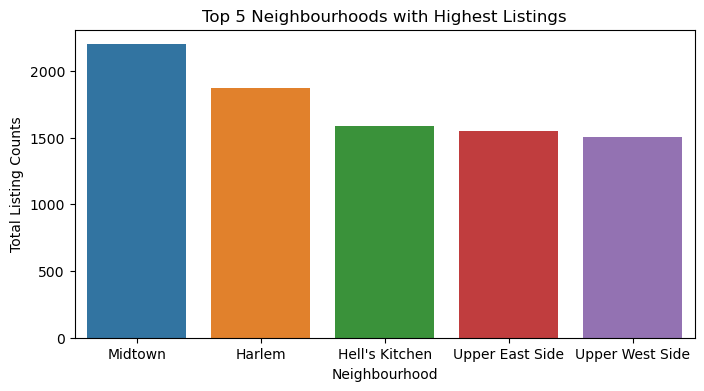

In [21]:
plt.figure(figsize=(8,4))
sns.countplot(data=manhattan_listing, x='neighbourhood', order = manhattan_listing['neighbourhood'].value_counts().nlargest(5).index)
plt.title("Top 5 Neighbourhoods with Highest Listings")
plt.xlabel("Neighbourhood")
plt.ylabel("Total Listing Counts")
plt.show()

- **Highest no. of listings**

In [22]:
highest_listing_count = df["calculated_host_listings_count"].max()
print("Highest listing count:", highest_listing_count)

Highest listing count: 713


- **Host with highest listing count**

In [23]:
# finding listings of all hosts with the highest no. of listings
host_with_highest_count = df[df["calculated_host_listings_count"] == highest_listing_count]["host_name"].unique()
print(host_with_highest_count.astype(str), "has highest number of hostings, totaling at:", highest_listing_count)

['Blueground'] has highest number of hostings, totaling at: 713


- **Most and Least Expensive Room Prices**

In [24]:
# most expensive
most_expensive_room = df["price"].max()
print("Most Expensive room:", most_expensive_room)

# least expensive
least_expensive_room = df["price"].unique()
least_expensive_room.sort()
print("Least Expensive room:", least_expensive_room[1])

Most Expensive room: 100000
Least Expensive room: 10


- **Most and least expensive neighbourhood groups**

In [25]:
# average price per group
avg_prive_per_group = df.groupby('neighbourhood_group')['price'].mean()
avg_prive_per_group

neighbourhood_group
Bronx            108.341931
Brooklyn         123.224138
Manhattan        204.258044
Queens           106.204068
Staten Island    119.989071
Name: price, dtype: float64

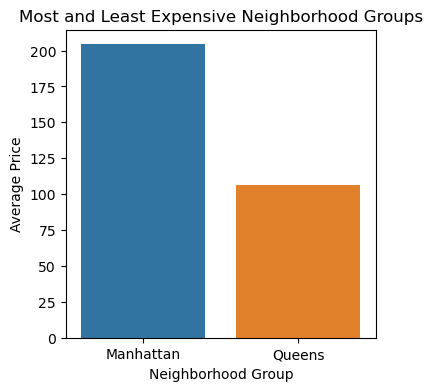

In [26]:
# for plotting the graph, we need to reset index
average_price_per_group = df.groupby('neighbourhood_group')['price'].mean().reset_index()

# Find the most expensive and least expensive neighborhood groups
most_expensive = average_price_per_group.nlargest(1, 'price')
least_expensive = average_price_per_group.nsmallest(1, 'price')

# Create a bar plot for the most expensive and least expensive neighborhood groups
plt.figure(figsize=(4, 4))
plot = sns.barplot(data=pd.concat([most_expensive, least_expensive]), x='neighbourhood_group', y='price')
plot.set_title('Most and Least Expensive Neighborhood Groups')
plot.set_xlabel('Neighborhood Group')
plot.set_ylabel('Average Price')
plt.show()

- **Distribution of Room Types**

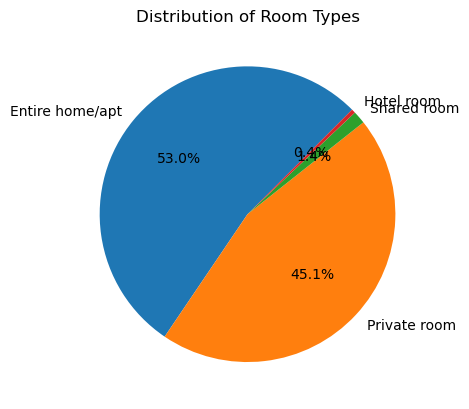

In [27]:
# plotting a count plot for "neighbourhood_group"
room_type_counts = df['room_type'].value_counts()
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=45)
plt.title('Distribution of Room Types')
plt.show()

## **2. Geological Analysis**
---
Here, we will perform analysis on geological locations.

- `Importing` Map Data

In [29]:
neighbourhoods = gpd.read_file("neighbourhoods.geojson")
listings = pd.read_csv("listings.csv")

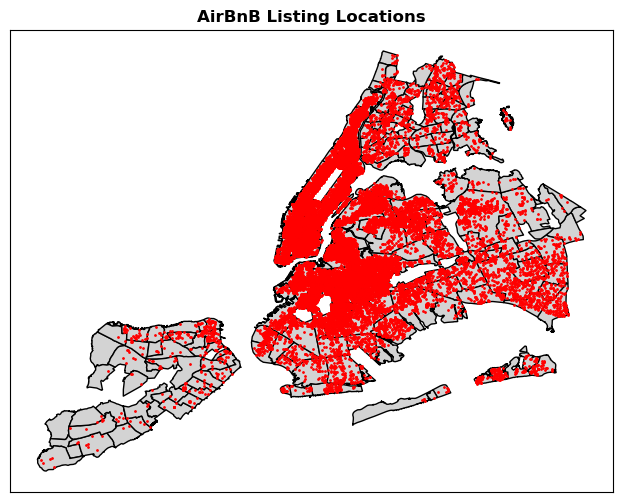

In [48]:
listings_geometry = gpd.points_from_xy(listings["longitude"], listings["latitude"])
listings_gdf = gpd.GeoDataFrame(listings, geometry=listings_geometry)
neighbourhoods.plot(figsize=(8, 6), color='lightgrey', edgecolor='black')

plt.title("AirBnB Listing Locations", fontweight = 'bold')
plt.xticks([])
plt.yticks([])

listings_gdf.plot(ax=plt.gca(), color='red', markersize=1)
plt.show()

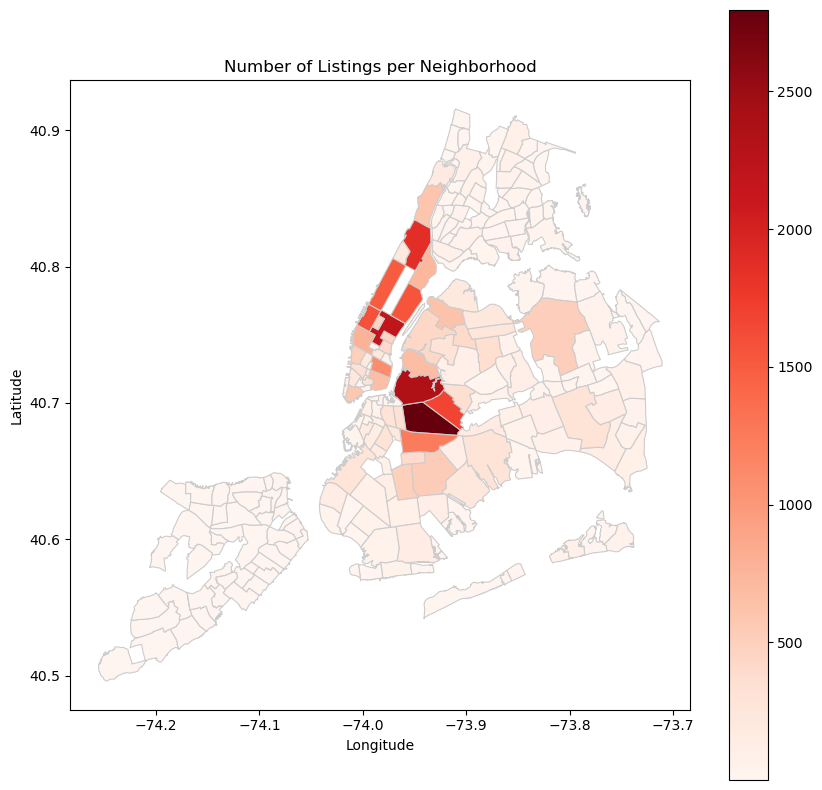

In [38]:
# Read the GeoJSON file
neighborhoods = gpd.read_file("neighbourhoods.geojson")

# Read the CSV file
listings = pd.read_csv("listings.csv")

# Count the number of listings in each neighborhood
neighborhood_counts = listings['neighbourhood'].value_counts().reset_index()
neighborhood_counts.columns = ['neighbourhood', 'count']

# Merge neighborhood counts with neighborhoods GeoDataFrame
neighborhoods = neighborhoods.merge(neighborhood_counts, how='left', on='neighbourhood')

# Plot the neighborhoods map with colored blocks
fig, ax = plt.subplots(figsize=(10, 10))
neighborhoods.plot(column='count', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title and axis labels
plt.title('Number of Listings per Neighborhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

---

In [39]:
reviews = pd.read_csv("detailed_reviews.csv")

In [40]:
df.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,21935608,5448955,Mike,Manhattan,East Village,40.73179,-73.98679,Entire home/apt,0,30,15,0,1,0,0
1,743430766348459803,83422715,D,Brooklyn,Flatbush,40.65375,-73.95502,Entire home/apt,289,30,0,-1,1,365,0
2,22122723,43719554,Bersabel,Manhattan,Harlem,40.82440,-73.94598,Private room,0,30,0,-1,1,0,0
3,22434861,5925222,Sophia,Brooklyn,Bushwick,40.69020,-73.91782,Entire home/apt,0,30,1,0,1,0,0
4,35713272,268631641,Harris,Manhattan,East Village,40.72385,-73.97695,Private room,0,30,1,0,1,0,0


In [41]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [42]:
reviews.shape

(1001295, 6)

In [43]:
reviews.isna().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      3
comments         256
dtype: int64

In [44]:
reviews.dropna(inplace=True)

In [45]:
reviews.reset_index(inplace=True)

In [46]:
detailed_listings = pd.read_csv("detailed_listings.csv")

In [47]:
detailed_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,47828453,https://www.airbnb.com/rooms/47828453,20240106043908,2024-01-06,city scrape,Rental unit in Albany · ★4.40 · 2 bedrooms · 3...,NaN,NaN,https://a0.muscache.com/pictures/47b30ae3-42bc...,299638115,...,4.73,4.20,4.27,NaN,f,3,3,0,0,0.42
1,13711253,https://www.airbnb.com/rooms/13711253,20240106043908,2024-01-06,city scrape,Home in Albany · ★4.77 · 1 bedroom · 1 bed · 1...,NaN,2 block away from Honest Weight Co Op organic ...,https://a0.muscache.com/pictures/0dfbddb7-b6eb...,61700428,...,4.97,4.63,4.82,NaN,f,3,0,3,0,2.45
2,684100173908872919,https://www.airbnb.com/rooms/684100173908872919,20240106043908,2024-01-06,city scrape,Condo in Albany · ★4.40 · 1 bedroom · 2 beds ·...,NaN,NaN,https://a0.muscache.com/pictures/dad915ce-0619...,1176120,...,4.79,4.10,4.41,NaN,f,3,3,0,0,4.20
3,48124042,https://www.airbnb.com/rooms/48124042,20240106043908,2024-01-06,city scrape,Rental unit in Albany · ★4.89 · 2 bedrooms · 3...,NaN,Downtown Albany - Corner of North Pearl and Ma...,https://a0.muscache.com/pictures/miso/Hosting-...,385664127,...,4.93,4.89,4.86,NaN,f,2,2,0,0,5.54
4,588298411730694861,https://www.airbnb.com/rooms/588298411730694861,20240106043908,2024-01-06,city scrape,Rental unit in Albany · ★5.0 · 1 bedroom · 1 b...,NaN,NaN,https://a0.muscache.com/pictures/b93dc43c-6bd4...,353498132,...,5.00,4.56,5.00,NaN,f,5,5,0,0,0.48


In [48]:
detailed_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [49]:
detailed_listings = detailed_listings[['id', 'host_response_time', 'host_is_superhost', 'has_availability', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 
                                       'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'reviews_per_month']]

In [50]:
detailed_listings.head()

,id,host_response_time,host_is_superhost,has_availability,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,47828453,within an hour,t,t,0,4.40,4.67,4.67,4.73,4.73,4.20,4.27,f,0.42
1,13711253,within an hour,f,t,0,4.77,4.78,4.48,4.97,4.97,4.63,4.82,f,2.45
2,684100173908872919,within an hour,f,t,52,4.40,4.53,4.64,4.81,4.79,4.10,4.41,f,4.20
3,48124042,within an hour,t,t,51,4.89,4.94,4.93,4.96,4.93,4.89,4.86,f,5.54
4,588298411730694861,within an hour,t,t,4,5.00,5.00,4.89,5.00,5.00,4.56,5.00,f,0.48


In [51]:
detailed_listings.shape

(410, 14)